In [1]:
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, roc_curve
from sklearn.ensemble import RandomForestClassifier
import glob
import os
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [2]:
train_df = pd.read_csv("data/twitter_data_train_multiclass.csv")
test_df = pd.read_csv("data/twitter_data_test_multiclass.csv")

print(train_df.shape)
print(test_df.shape)

(9446, 236)
(1667, 236)


In [3]:
to_drop = [
    'account_type', 
    'account_type_multi',
    'id', 
    'name', 
    'screen_name',
    'profile_image_url',
    'protected',
    'verified',
    'description',
    'description_processed',
    'tweets_list',
    'tweets_list_processed',
    'url'
    ]

X_train, y_train = train_df.drop(to_drop, axis=1), train_df['account_type_multi']
X_test, y_test = test_df.drop(to_drop, axis=1), test_df['account_type_multi']

# X_train.fillna(0, inplace=True)
# X_test.fillna(0, inplace=True)


**Random Forest model training and testing**

In [4]:
# Random forest model 
# training
regressor = RandomForestClassifier(n_estimators=100, max_depth=5 )
regressor.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

**Evaluate Model Performance**

In [5]:
# train
y_pred_train = regressor.predict(X_train)
print(classification_report(y_train, y_pred_train, digits=5))
# roc_auc_score(y_train, y_pred_train, multi_class='ovr')

              precision    recall  f1-score   support

           0    0.84067   0.98845   0.90859      2338
           1    0.93915   0.98670   0.96234      2706
           2    1.00000   0.93046   0.96398       302
           3    0.99259   0.94010   0.96563      3706
           4    1.00000   0.20064   0.33422       314
           5    0.00000   0.00000   0.00000        80

    accuracy                        0.93256      9446
   macro avg    0.79540   0.67439   0.68913      9446
weighted avg    0.93176   0.93256   0.92135      9446



c:\Users\valen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\valen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\valen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
# test
y_pred_test = regressor.predict(X_test)
print(classification_report(y_test, y_pred_test, digits=5))
# roc_auc_score(y_test, y_pred_test)

              precision    recall  f1-score   support

           0    0.81238   0.98547   0.89059       413
           1    0.93416   0.98696   0.95983       460
           2    1.00000   0.87931   0.93578        58
           3    0.99839   0.92943   0.96267       666
           4    1.00000   0.16981   0.29032        53
           5    0.00000   0.00000   0.00000        17

    accuracy                        0.92382      1667
   macro avg    0.79082   0.65850   0.67320      1667
weighted avg    0.92450   0.92382   0.91190      1667



c:\Users\valen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\valen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\valen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Hyperparameter Tuning**

We will use RandomizedSearchCV to narrow down the range for grid search hyperparameter tuning.


In [7]:
regressor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [8]:
# Number of trees in random forest
n_estimators = [50,100,150]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,5,8]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the grid
grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(grid)

{'n_estimators': [50, 100, 150], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 5, 8], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 3], 'bootstrap': [True, False]}


In [9]:
# Random forest model 
# training
regressor = RandomForestClassifier()

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=2022)

rf_randomcv = RandomizedSearchCV(
    estimator=regressor,
    param_distributions=grid,
    n_iter=100, 
    cv=cv_method,
    verbose=2,
    random_state=2022,
    n_jobs=-1, # use all processors,
    scoring='f1_weighted'
)

rf_randomcv.fit(X_train, y_train)


Fitting 15 folds for each of 100 candidates, totalling 1500 fits


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=2022),
                   estimator=RandomForestClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 5, 8],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150]},
                   random_state=2022, scoring='f1_weighted', verbose=2)

In [10]:
rf_randomcv.best_params_

{'n_estimators': 150,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 8,
 'bootstrap': False}

In [11]:
rf_randomcv.best_score_

0.985660068788373

**Use tuned classifier**

In [12]:
import time

from sklearn.metrics import f1_score

best_clf = RandomForestClassifier(**rf_randomcv.best_params_)

start_time = time.time()

best_clf.fit(X_train, y_train)
y_pred_test = best_clf.predict(X_test)

time_taken = time.time() - start_time
print("Total time taken for the program execution", time_taken) # seconds
print(classification_report(y_test, y_pred_test, digits=5))
# roc_auc_score(y_test, y_pred_test)
f1_score(y_test, y_pred_test, average='weighted')

Total time taken for the program execution 2.419250726699829
              precision    recall  f1-score   support

           0    0.94213   0.98547   0.96331       413
           1    0.98498   0.99783   0.99136       460
           2    1.00000   0.89655   0.94545        58
           3    1.00000   0.97447   0.98707       666
           4    1.00000   0.98113   0.99048        53
           5    1.00000   0.94118   0.96970        17

    accuracy                        0.98080      1667
   macro avg    0.98785   0.96277   0.97456      1667
weighted avg    0.98152   0.98080   0.98085      1667



0.9808524312666568

ROC Curves for classifier before and after tuning

In [13]:
regressor.fit()
y_pred_prob1 = regressor.predict_proba(X_test)[:, 1]
fpr1, tpr1, thresholds = roc_curve(y_test, y_pred_prob1)
y_pred_prob2 = best_clf.predict_proba(X_test)[:, 1]
fpr2, tpr2, thresholds = roc_curve(y_test, y_pred_prob2)

plt.plot(fpr1, tpr1, label = "without tuning")
plt.plot(fpr2, tpr2, label ="with tuning")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.grid(True)

TypeError: fit() missing 2 required positional arguments: 'X' and 'y'

Visualising some of the trees in the random forest

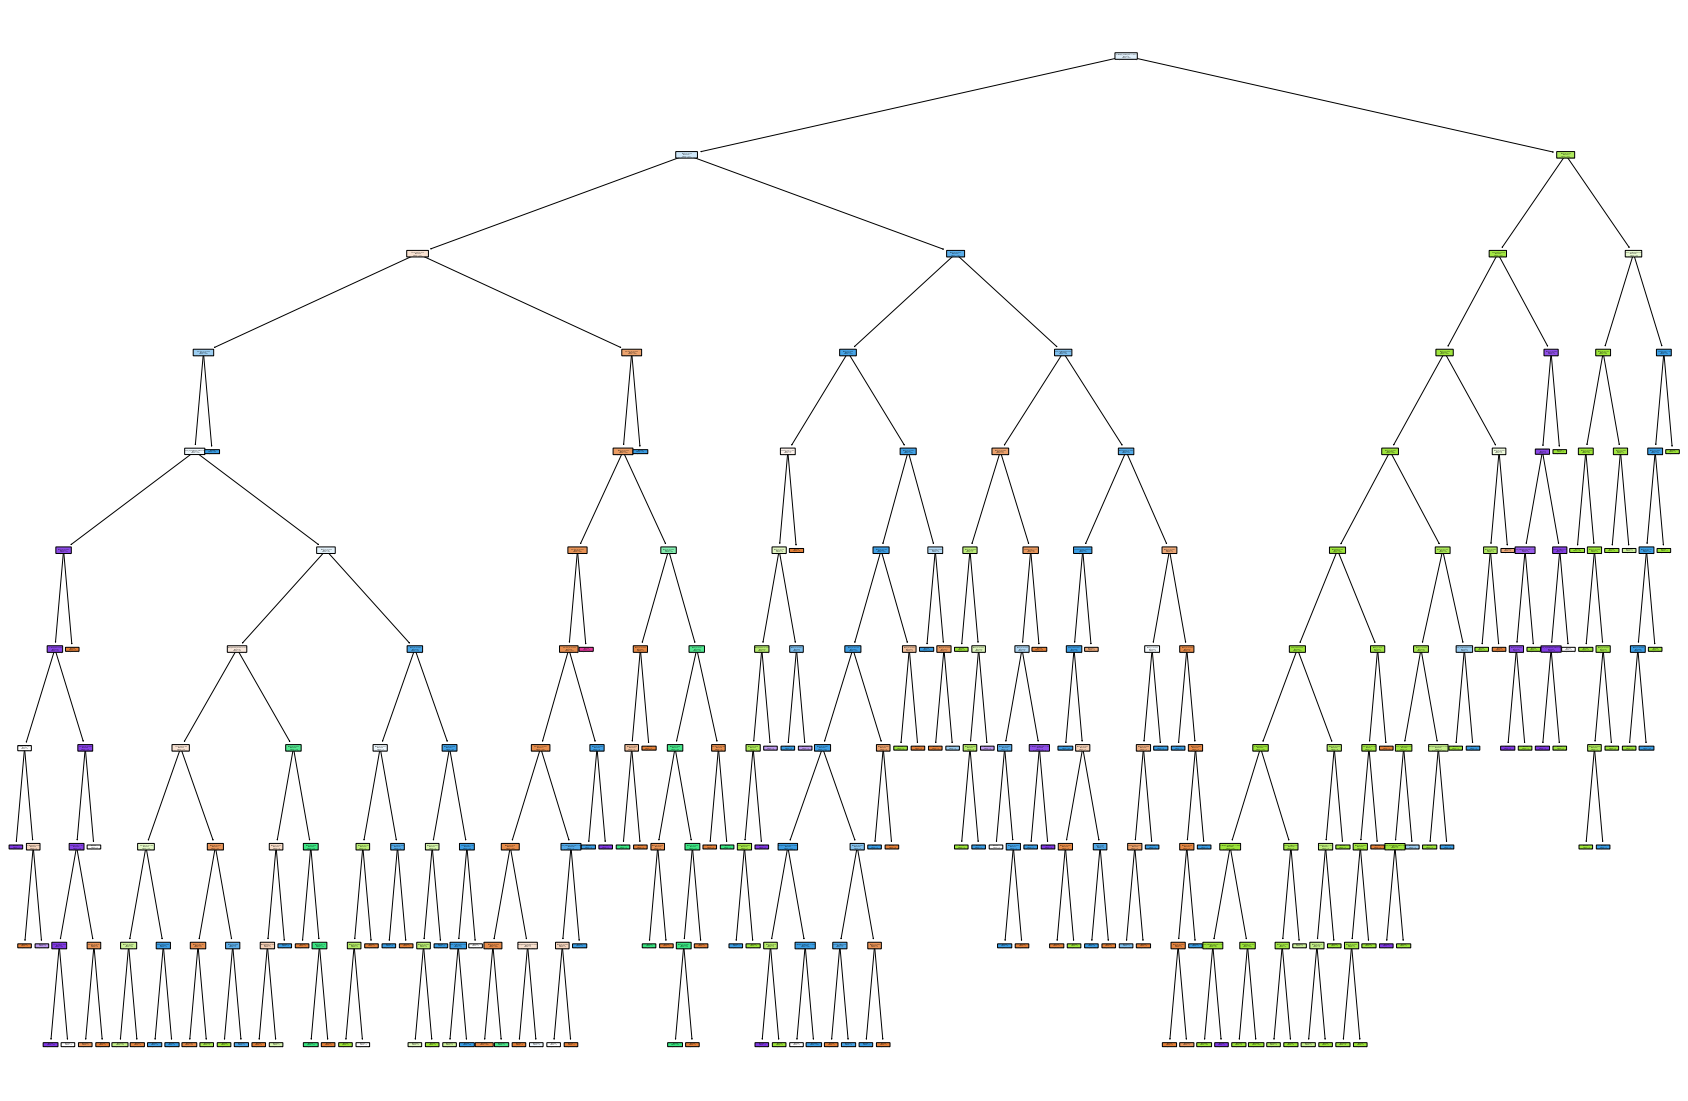

In [ ]:

fig = plt.figure(figsize=(30, 20))
plot_tree(best_clf.estimators_[0], 
          feature_names=X_train.columns,
        #   class_names=["0","1"], 
          filled=True, rounded=True)

plt.show()

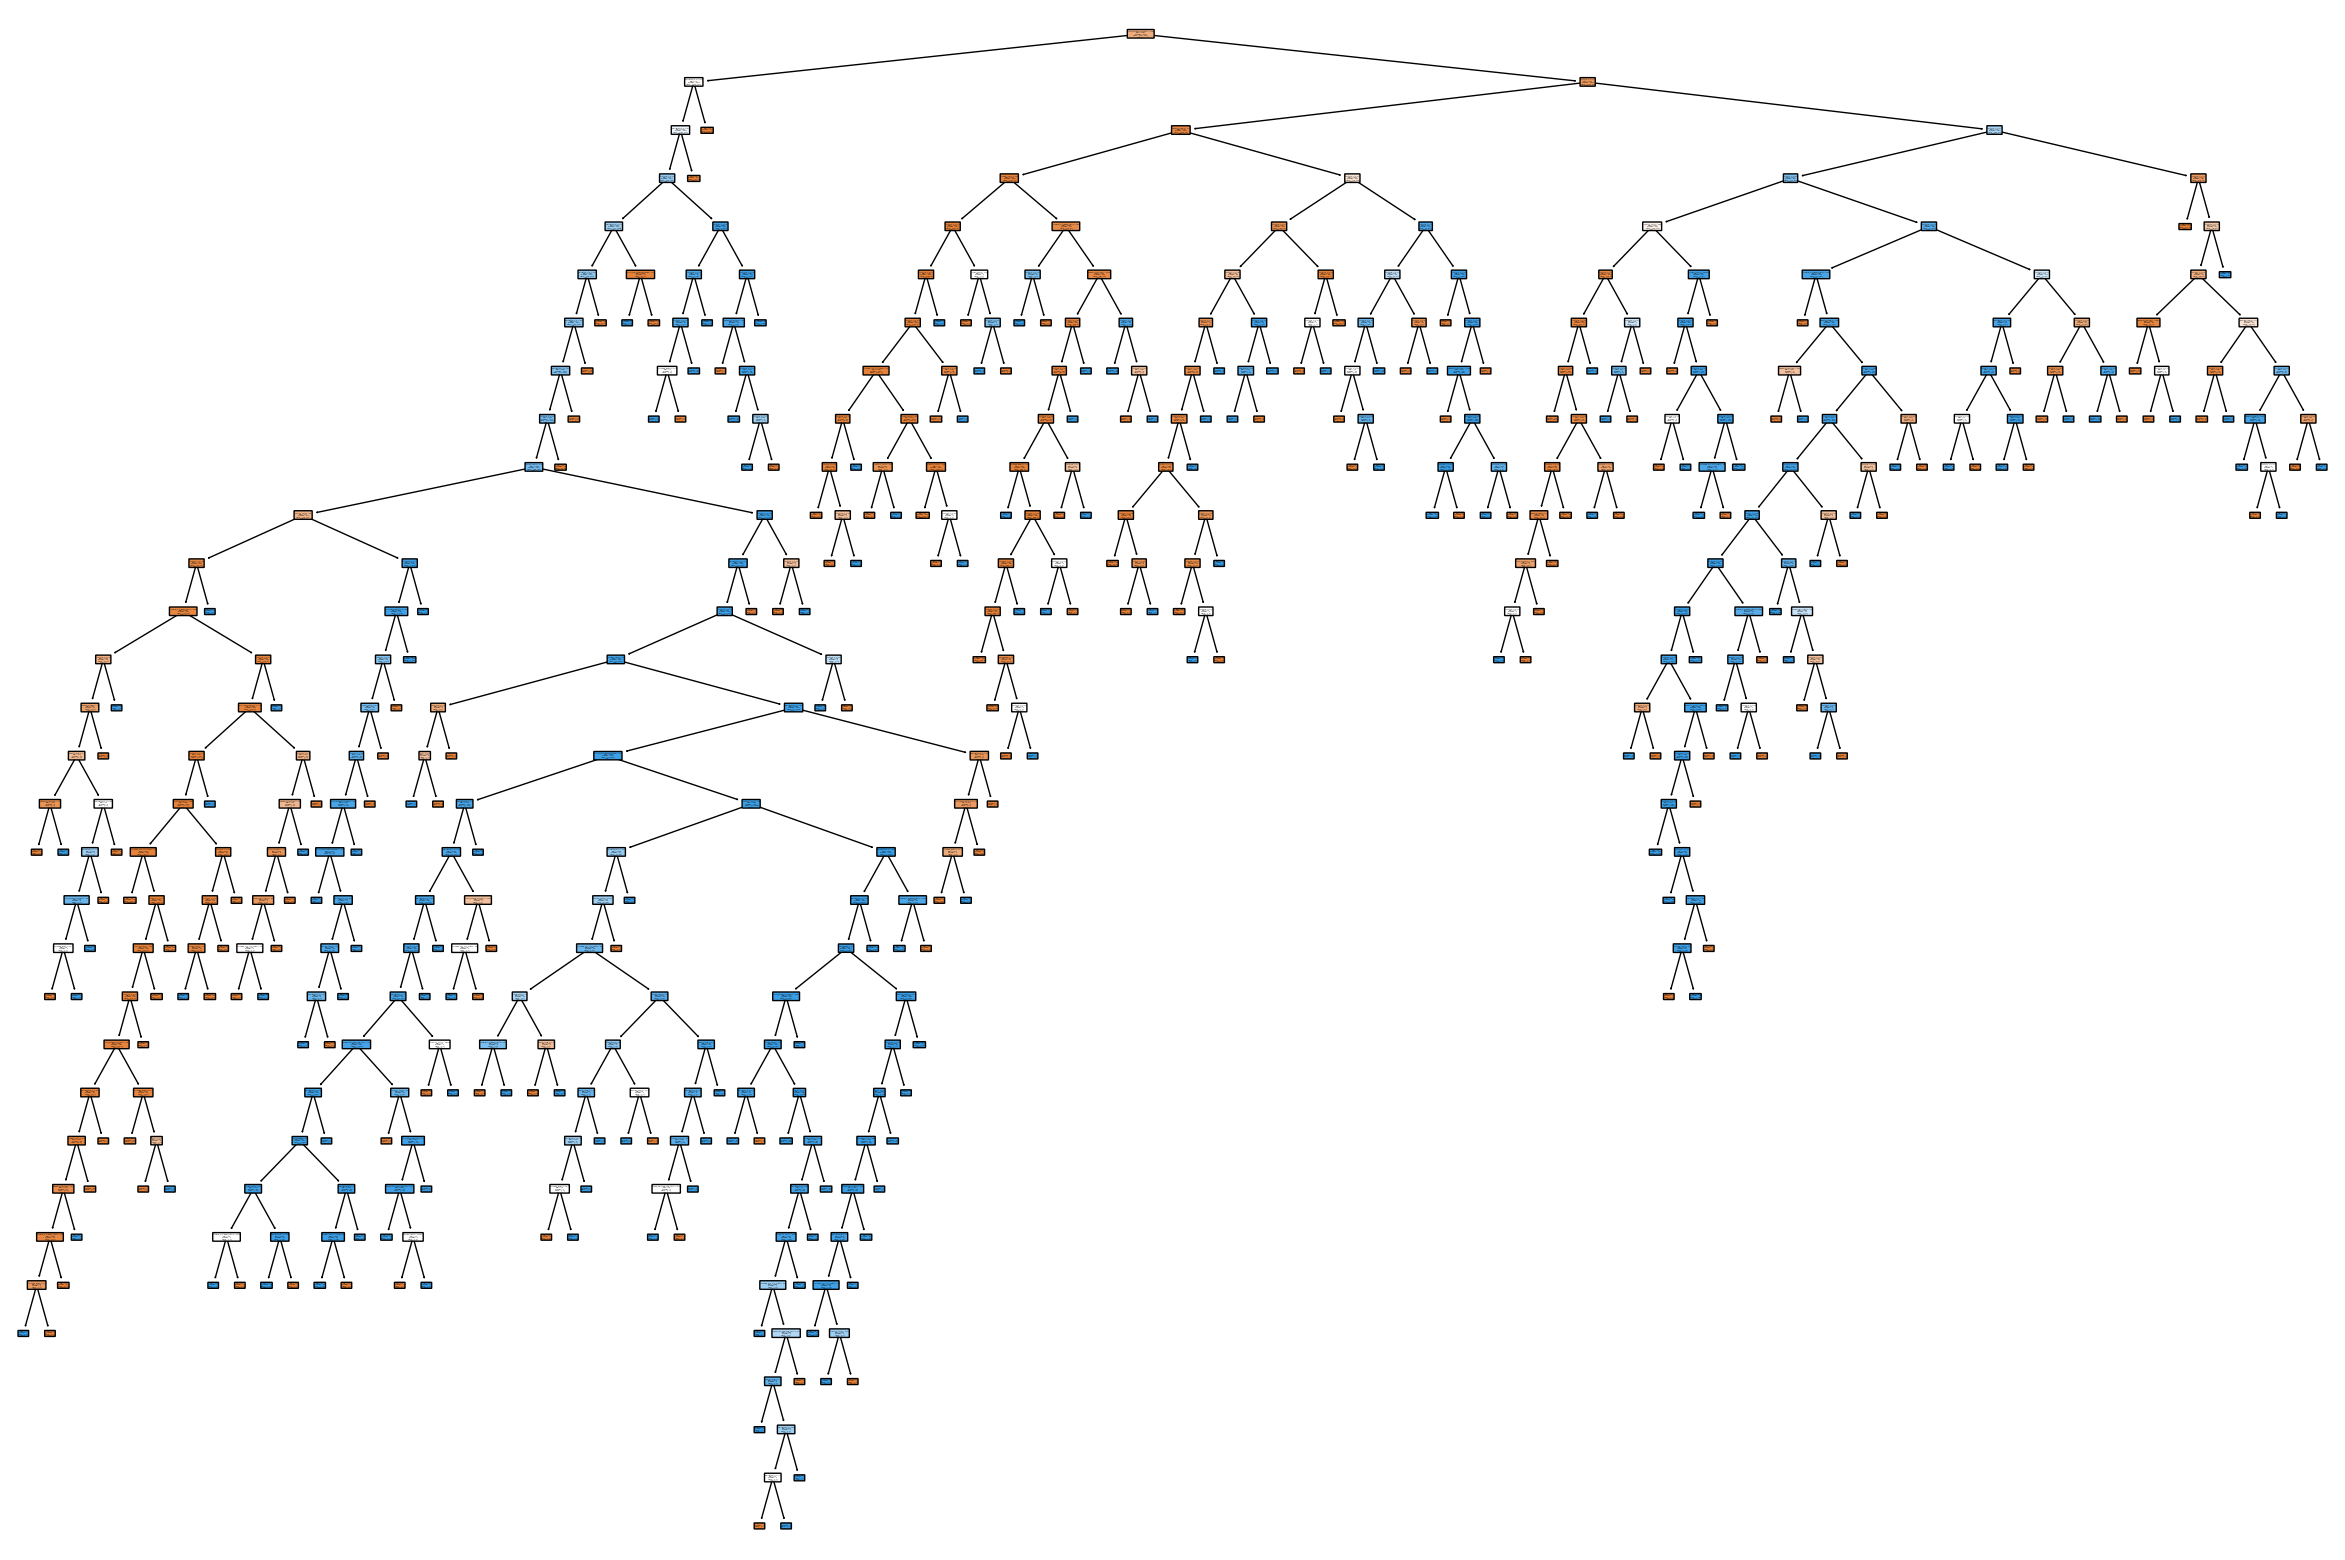

In [ ]:

fig = plt.figure(figsize=(30, 20))
plot_tree(best_clf.estimators_[1], 
          feature_names=X_train.columns,
          class_names=["0","1"], 
          filled=True, rounded=True)

plt.show()

In [ ]:
best_clf.estimators_[0]

DecisionTreeClassifier(max_depth=10, max_features='sqrt', min_samples_split=5,
                       random_state=1631964483)